In [9]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append('../')

from circularcoordinates import CircCoordLn
from circularcoordinates import weighted_circular_coordinate, weight_degree_sum_meta
from dataset import noisy_conjoined

In [10]:
_ = noisy_conjoined(True)
data, coord_1, coord_2 = [_[el] for el in ['data', 'coord_1', 'coord_2']]
prime = 47

In [11]:
fts = [
    None,
    lambda x: 1 / np.sqrt(x), lambda x: 1 / x,
    lambda x: 1 / x ** 2, lambda x: 1 / x ** 4,
]
labels = [
    'Original',
    '$1/x^{0.5}$', '$1/x$',
    '$1/x^2$', '$1/x^4$',
]

In [12]:
results_0 = np.mod(np.asarray([weighted_circular_coordinate(
    data,
    weight_degree_sum_meta(ft),
    prime=prime,
    order=0
) for ft in tqdm(fts)]), 1.0)
results_1 = np.mod(np.asarray([weighted_circular_coordinate(
    data,
    weight_degree_sum_meta(ft),
    prime=prime,
    order=1
) for ft in tqdm(fts)]), 1.0)

100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


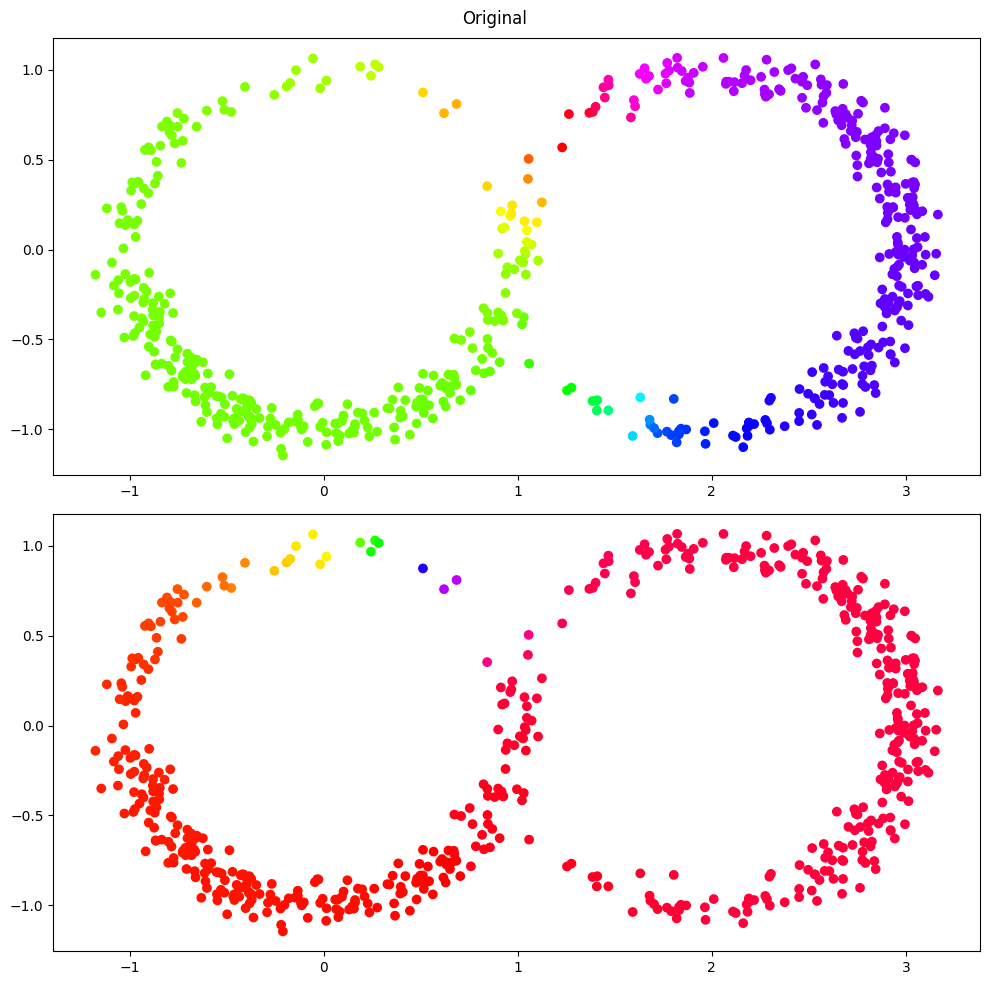

In [13]:
fig, axs = plt.subplots(2,1, figsize=(10, 10))
axs[0].scatter(*data.T, c=results_0[0], cmap='hsv')
axs[1].scatter(*data.T, c=results_1[0], cmap='hsv')
plt.suptitle('Original')
plt.tight_layout()
plt.show()
plt.close()

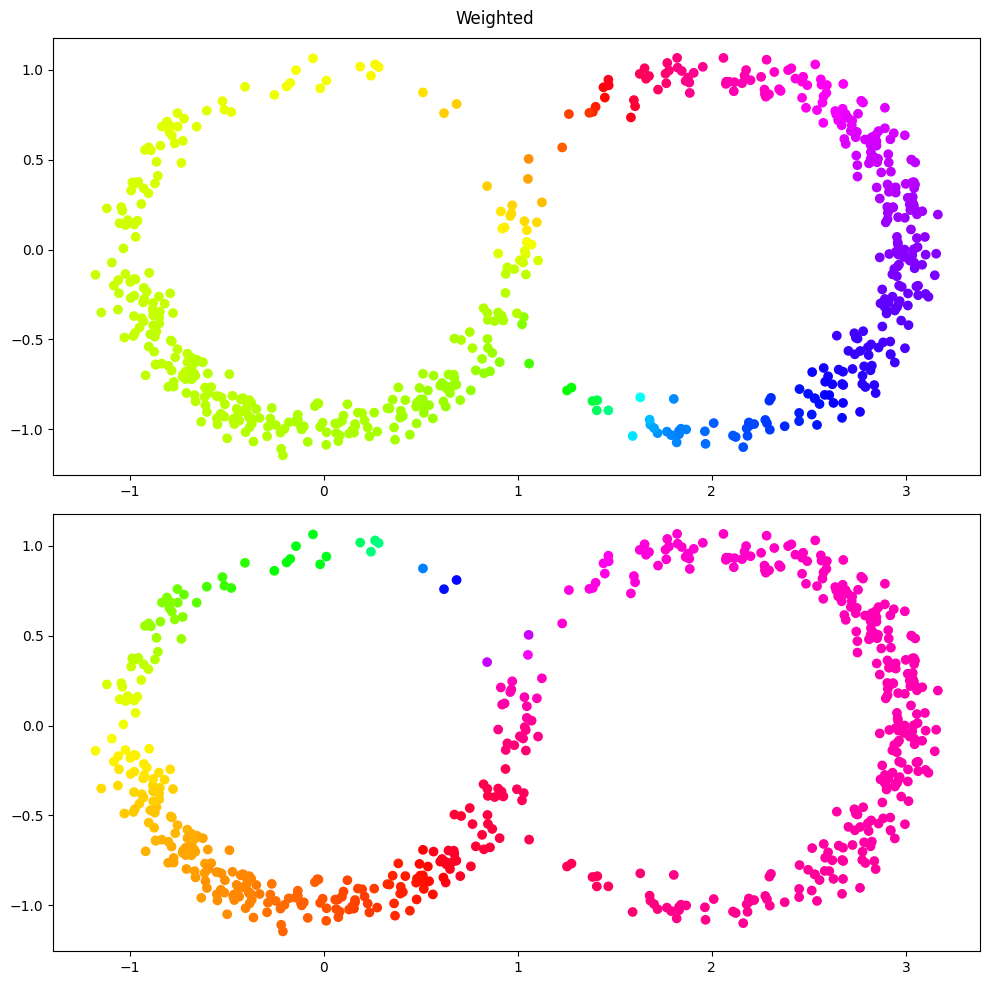

In [14]:
fig, axs = plt.subplots(2,1, figsize=(10, 10))
axs[0].scatter(*data.T, c=results_0[2], cmap='hsv')
axs[1].scatter(*data.T, c=results_1[2], cmap='hsv')
plt.suptitle('Weighted')
plt.tight_layout()
plt.show()
plt.close()

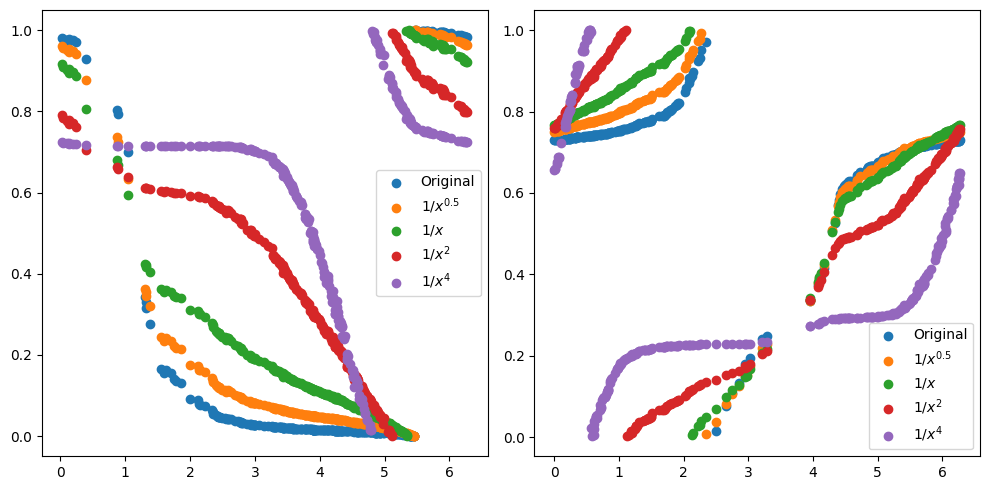

In [15]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
for result, label in zip(results_1, labels):
    axs[0].scatter(coord_1, result[:300], label=label)
axs[0].legend()
for result, label in zip(results_0, labels):
    axs[1].scatter(coord_2, result[300:], label=label)
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()

In [16]:
hyper_params = [
    {'epoch': 100, 'lr': 0.001, 'p_norm': 2},
    {'epoch': 2000, 'lr': 0.05, 'p_norm': 4},
    {'epoch': 2000, 'lr': 0.05, 'p_norm': 6},
    {'epoch': 2000, 'lr': 0.05, 'p_norm': 10},
    {'epoch': 5000, 'lr': 0.05, 'p_norm': 20},
]
ccl = CircCoordLn(data, prime=prime)
ccl.setup(0)
orig_1 = ccl.cc_original()
ccl.f_reset_L2()
lp_results_0 = []
for param in hyper_params:
    lp_results_0.append(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0])
lp_results_0.append(ccl.cc_Linf_Lp(10000, 0.0001, 0.001, 20, 25)[0])
lp_results_0 = np.asarray(lp_results_0)

ccl.setup(1)
orig_2 = ccl.cc_original()
ccl.f_reset_L2()
lp_results_1 = []
for param in hyper_params:
    lp_results_1.append(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0])
lp_results_1.append(ccl.cc_Linf_Lp(10000, 0.0001, 0.001, 20, 25)[0])
lp_results_1 = np.asarray(lp_results_1)
lp_results = np.stack([lp_results_0, lp_results_1])

100%|██████████| 10000/10000 [01:07<00:00, 148.20it/s, 0.17202 / 0.17202 / p = infty]        


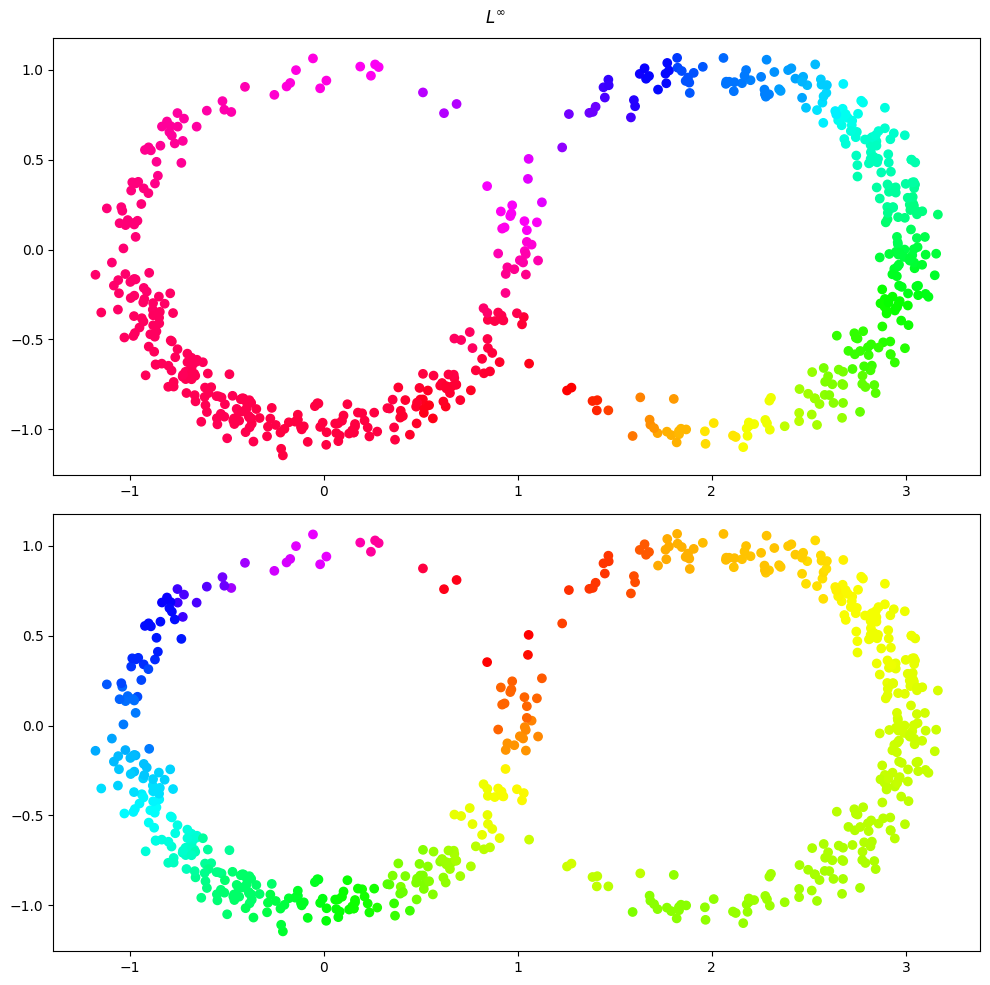

In [17]:
fig, axs = plt.subplots(2,1,figsize=(10, 10))
axs[0].scatter(*data.T, c=lp_results[0][-1], cmap='hsv')
axs[1].scatter(*data.T, c=lp_results[1][-1], cmap='hsv')
plt.suptitle('$L^\infty$')
plt.tight_layout()
plt.show()
plt.close()

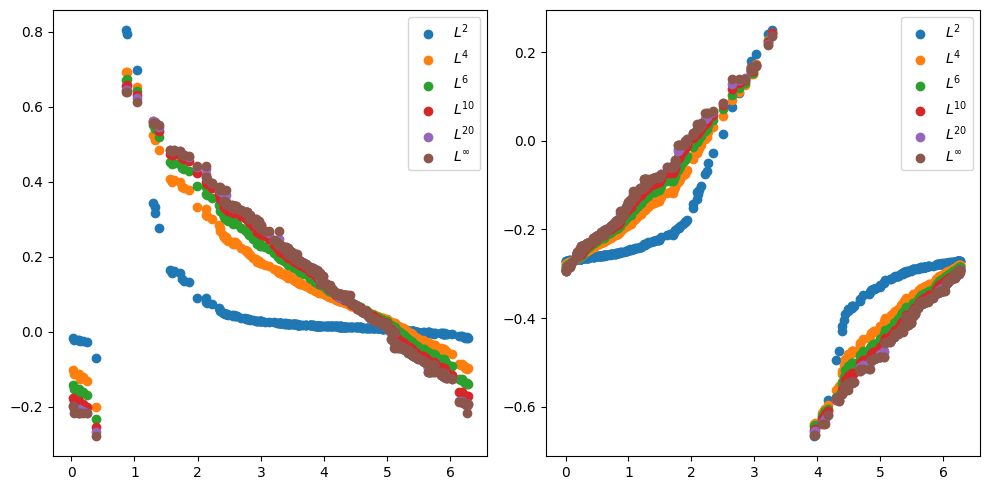

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for result, label in zip(lp_results[1], [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[0].scatter(coord_1, result[:300], label=f'$L^{label}$')
for result, label in zip(lp_results[0], [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[1].scatter(coord_2, result[300:], label=f'$L^{label}$')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()